# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
bankcluster_df = pd.read_csv('/content/drive/MyDrive/Laskar Ai/bank_cluster.csv')
bankcluster_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,60+,1
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,60+,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,19-30,2
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,19-30,0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,19-30,2


## Preprocessing Data

In [28]:
# Menghapus variabel yang tidak diperlukan

bankcluster_df = bankcluster_df.drop(columns=['TransactionID', 'AccountID', 'TransactionDate', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate', 'AgeGroup'])
bankcluster_df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,14.09,Debit,ATM,70.0,Doctor,81.0,1.0,5112.21,1
1,376.24,Debit,ATM,68.0,Doctor,141.0,1.0,13758.91,0
2,126.29,Debit,Online,19.0,Student,56.0,1.0,1122.35,2
3,184.50,Debit,Online,26.0,Student,25.0,1.0,8569.06,0
4,13.45,Credit,Online,26.0,Student,198.0,1.0,7429.40,2


In [29]:
bankcluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   object 
 2   Channel              2512 non-null   object 
 3   CustomerAge          2512 non-null   float64
 4   CustomerOccupation   2512 non-null   object 
 5   TransactionDuration  2512 non-null   float64
 6   LoginAttempts        2512 non-null   float64
 7   AccountBalance       2512 non-null   float64
 8   Cluster              2512 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 176.8+ KB


In [30]:
# Label Endocer untuk variabel kategori

# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ['TransactionType', 'Channel', 'CustomerOccupation']

# Encode kolom kategorikal
for column in categorical_columns:
    bankcluster_df[column] = label_encoder.fit_transform(bankcluster_df[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
bankcluster_df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,14.09,1,0,70.0,0,81.0,1.0,5112.21,1
1,376.24,1,0,68.0,0,141.0,1.0,13758.91,0
2,126.29,1,2,19.0,3,56.0,1.0,1122.35,2
3,184.50,1,2,26.0,3,25.0,1.0,8569.06,0
4,13.45,0,2,26.0,3,198.0,1.0,7429.40,2


In [31]:
# Standarisasi variabel numerik selain target

# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
columns = ['TransactionAmount', 'TransactionType', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
bankcluster_df[columns] = scaler.fit_transform(bankcluster_df[columns])

In [32]:
bankcluster_df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,0.007207,1.0,0.0,0.838710,0.0,0.244828,0.0,0.336832,1
1,0.195940,1.0,0.0,0.806452,0.0,0.451724,0.0,0.918055,0
2,0.065680,1.0,1.0,0.016129,1.0,0.158621,0.0,0.068637,2
3,0.096016,1.0,1.0,0.129032,1.0,0.051724,0.0,0.569198,0
4,0.006874,0.0,1.0,0.129032,1.0,0.648276,0.0,0.492591,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [33]:
# Pisahkan fitur (X) dan target (y)
X = bankcluster_df.drop(columns=['Cluster'])
y = bankcluster_df['Cluster']

In [34]:
# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(2009, 8), y_train=(2009,)
Test set shape: X_test=(503, 8), y_test=(503,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [35]:
lr = LogisticRegression().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)

Dalam proyek ini, digunakan 4 algoritma pemodelan untuk Klasifikasi
-	Logistic Regression digunakan untuk memprediksi probabilitas sebuah sampel masuk pada kategori tertentu. Logistic regression sangat umum digunakan dalam kasus klasifikasi biner.
-	Decision Tree menggunakan struktur pohon untuk membuat keputusan klasifikasi. Setiap cabang pohon mewakili tes pada fitur tertentu dan setiap daun mewakili keputusan atau prediksi. Algoritma ini mudah diinterpretasikan dan dapat menangani data yang tidak terstruktur dengan baik.
-	Random Forest adalah versi lanjutan dari Decision Tree yang menggunakan banyak pohon keputusan untuk meningkatkan akurasi prediksi. Algoritma ini menggabungkan hasil beberapa pohon keputusan yang dibangun dari sampel acak dataset sehingga mengurangi risiko overfitting dan memberikan hasil lebih stabil.
-	KNN adalah algoritma yang mengklasifikasikan data berdasarkan kedekatannya dengan data lain yang sudah diberi label. Data baru diklasifikasikan ke dalam kelas yang paling umum di antara tetangga terdekatnya. KNN sangat sederhana, tetapi efektif, terutama ketika data memiliki pola yang jelas.

Keempat algoritma ini digunakan karena dapat membantu untuk membandingkan kinerjanya sehingga dapat dipilih model terbaik.


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

### Logistic Regression

==== Logistic Regression (Multi-class) ====
Confusion Matrix:
[[175   6   0]
 [  2 172   0]
 [  0   0 148]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       181
           1       0.97      0.99      0.98       174
           2       1.00      1.00      1.00       148

    accuracy                           0.98       503
   macro avg       0.98      0.99      0.98       503
weighted avg       0.98      0.98      0.98       503

Accuracy: 0.9841
Precision (macro): 0.9850
Recall (macro): 0.9851
F1-Score (macro): 0.9850

----------------------------------------



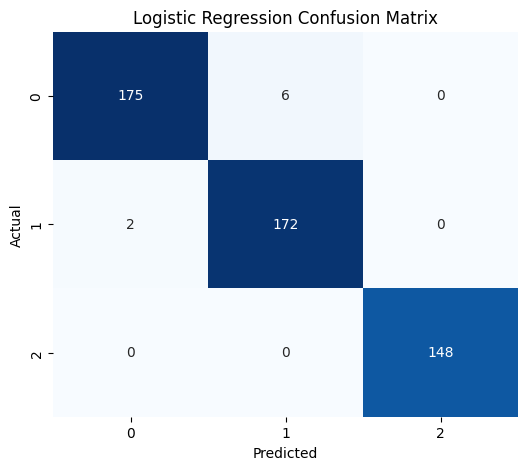

In [42]:
# Prediksi dengan Logistic Regression
y_pred_lr = lr.predict(X_test)

# Confussion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Evaluation metrics
print("==== Logistic Regression (Multi-class) ====")
print("Confusion Matrix:")
print(cm_lr)
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred_lr, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_lr, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, y_pred_lr, average='macro'):.4f}")
print("\n" + "-"*40 + "\n")

# Visualisasi
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Decision Tree

==== Decision Tree Classifier (Multi-class) ====
Confusion Matrix:
[[179   1   1]
 [  2 170   2]
 [  0   0 148]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       181
           1       0.99      0.98      0.99       174
           2       0.98      1.00      0.99       148

    accuracy                           0.99       503
   macro avg       0.99      0.99      0.99       503
weighted avg       0.99      0.99      0.99       503

Accuracy: 0.9881
Precision (macro): 0.9877
Recall (macro): 0.9887
F1-Score (macro): 0.9881

----------------------------------------



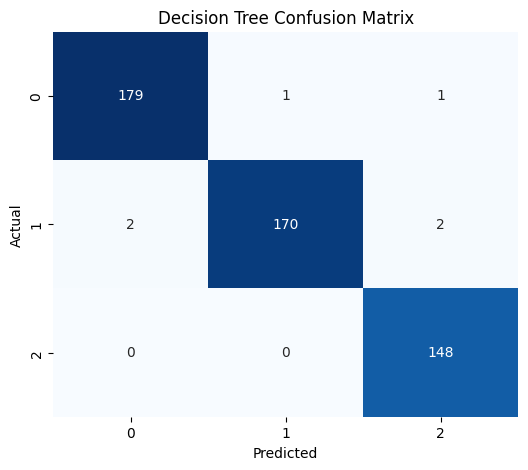

In [47]:
# Prediksi dengan Decision Tree
y_pred_dt = dt.predict(X_test)

# Confussion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Evaluation metrics
print("==== Decision Tree Classifier (Multi-class) ====")
print("Confusion Matrix:")
print(cm_dt)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, y_pred_dt, average='macro'):.4f}")
print("\n" + "-"*40 + "\n")

# Visualisasi
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random Forest

==== Random Forest Classifier (Multi-class) ====
Confusion Matrix:
[[179   1   1]
 [  1 172   1]
 [  0   0 148]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       181
           1       0.99      0.99      0.99       174
           2       0.99      1.00      0.99       148

    accuracy                           0.99       503
   macro avg       0.99      0.99      0.99       503
weighted avg       0.99      0.99      0.99       503

Accuracy: 0.9920
Precision (macro): 0.9918
Recall (macro): 0.9925
F1-Score (macro): 0.9921

----------------------------------------



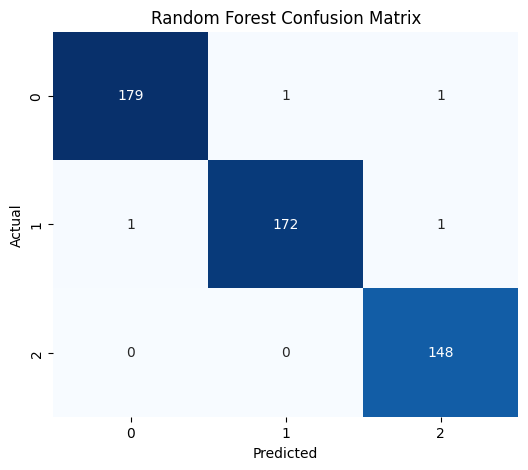

In [46]:
# Prediksi dengan Random Forest
y_pred_rf = rf.predict(X_test)

# Confussion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Evaluation metrics
print("==== Random Forest Classifier (Multi-class) ====")
print("Confusion Matrix:")
print(cm_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, y_pred_rf, average='macro'):.4f}")
print("\n" + "-"*40 + "\n")

# Visualisasi
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### KNN

==== KNN Classifier (Multi-class) ====
Confusion Matrix:
[[175   1   5]
 [  8 163   3]
 [  7   4 137]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       181
           1       0.97      0.94      0.95       174
           2       0.94      0.93      0.94       148

    accuracy                           0.94       503
   macro avg       0.95      0.94      0.94       503
weighted avg       0.95      0.94      0.94       503

Accuracy: 0.9443
Precision (macro): 0.9454
Recall (macro): 0.9431
F1-Score (macro): 0.9439

----------------------------------------



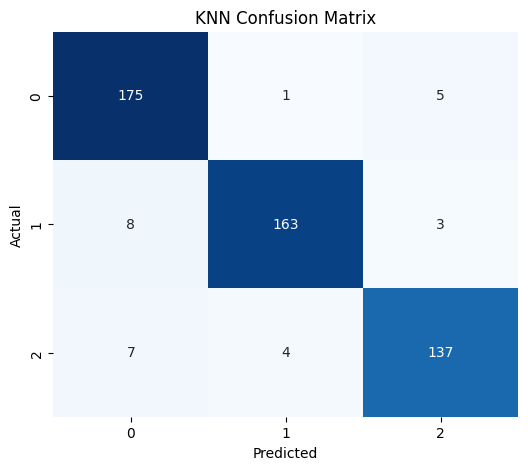

In [45]:
# Prediksi dengan KNN
y_pred_knn = knn.predict(X_test)

# Confussion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Evaluation metrics
print("==== KNN Classifier (Multi-class) ====")
print("Confusion Matrix:")
print(cm_knn)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred_knn, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_knn, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, y_pred_knn, average='macro'):.4f}")
print("\n" + "-"*40 + "\n")

# Visualisasi
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Rangkuman Hasil Evaluasi Model

In [48]:
def evaluate_model(model, X_test, y_test, average='macro'):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average=average),
        'Recall': recall_score(y_test, y_pred, average=average),
        'F1-Score': f1_score(y_test, y_pred, average=average)
    }
    return results

# Evaluasi setiap model
results = {
    'Logistic Regression': evaluate_model(lr, X_test, y_test),
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
}

# Membuat dataframe rangkuman hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

summary_df = pd.DataFrame(rows)

print(summary_df)

                       Model  Accuracy  Precision    Recall  F1-Score
0        Logistic Regression  0.984095   0.984998  0.985119  0.984975
1  K-Nearest Neighbors (KNN)  0.944334   0.945373  0.943103  0.943922
2         Decision Tree (DT)  0.988072   0.987745  0.988654  0.988141
3         Random Forest (RF)  0.992048   0.991777  0.992485  0.992111


Hasil evaluasi dari 4 algortima:
- Random Forest menunjukkan hasil terbaik di semua metrik (accuration, precision, recall, dan F1-score), sehingga menjadi model terbaik untuk dataset ini.
- KNN memiliki skor terendah di semua metrik, yang menunjukkan bahwa model ini kurang cocok dibanding mode lain untuk dataset ini.
- Logistic Regression dan Decision Tree memiliki performa yang baik, tapi Decision Tree sedikit lebih unggul dari Logistic Regression di semua metrik.


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**Analisis Hasil Evaluasi Model Klasifikasi**

1. Tidak dilakukan hyperparameter tuning
2. Berdasarkan hasil agregat evaluasi model, KMM memiliki skor Precision (0,9454) dan Recall (0,9431) paling rendah dibandingkan dengan model lainnya. hal ini menunjukkan adanya ketidakseimbangan performa antar kelas, seperti gagal mengidentifikasi beberapa kategori dengan baik.
Selain itu, terdapat potensi masalah overfitting pada model Random Forest dengan Accuracy 0,9920.
3. Berdasarkan evaluasi yang dilakukan, untuk selanjutnya dapat dilakukan cross-validation atau hyperparameter tuning untuk meminiimalkan potensi overfitting. Selain itu, dapat juga menggunakan dataset dengan lebih banyak baris untuk menguji model dengan data yang lebih representatif.